# Table of Contents
* [Intro](#Intro)
	* [Regression](#Regression)
* [Data](#Data)
* [Residuals and Cost](#Residuals-and-Cost)
* [Regression (Scipy)](#Regression-%28Scipy%29)
* [Gradient Descent](#Gradient-Descent)
	* [Training Animation](#Training-Animation)


# Intro

Exploratory notebook related to basic concepts and theory behind linear regression. Includes toy examples implementation and relative visualization.

## Regression

Regression is a supervised learning task concerned with the prediction of continuous numerical values. It contrasts with Classification, which is instead about the prediction of classes (categorical values).

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt, animation

%matplotlib notebook
#%matplotlib inline

# Data

In [2]:
# class for generic line defined by a slope and intercept
class Line:
    def __init__(self, slope, intercept):
        self.slope = slope
        self.intercept = intercept
        
    # get linspaces sample in the specified interval
    def get_sample(self, n, start=0.0, stop=1.0, noise=None):
        x = np.linspace(start, stop, n)
        y = self.get_y(x, noise=noise)
        return (x, y)
    
    # get random sample in the specified interval
    def get_rand_sample(self, n, start=0.0, stop=1.0, noise=None):
        x = (stop-start) * np.random.random_sample(n) + start
        y = self.get_y(x, noise=noise)
        return (x, y)
    
    def get_y(self, x, noise=None):
        y = x * self.slope + self.intercept
        if noise:
            y += (np.random.rand(len(y))*noise)
        return y

In [91]:
# plot (scatter) noise sample
line = Line(slope=1.5, intercept=5)
(x, y) = line.get_sample(100, noise=1)
sns.regplot(x, y, fit_reg=False)
sns.plt.show()

<IPython.core.display.Javascript object>


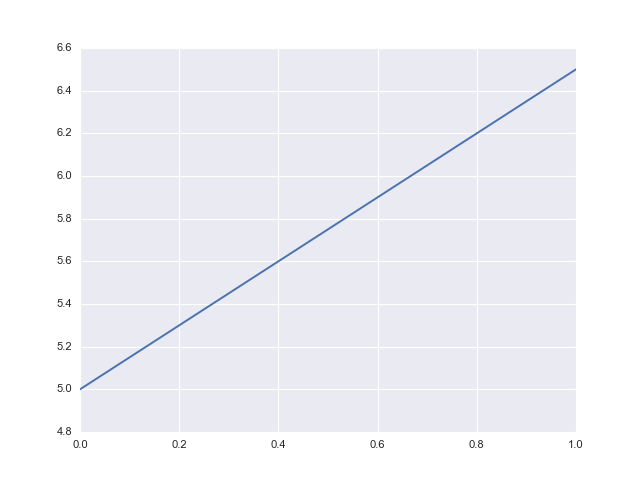

In [4]:
# plot line
plt.plot(*line.get_sample(100))
plt.show()

# Residuals and Cost

Residuals are the differences between the true and predicted values along the sole prediction axis. Mean-squared-error is a common way to compute the quality of a prediction set compared to the true set.

In [5]:
# mean squared error between true and predicted values
def compute_mse(y_true, y_pred):
    residuals = (y_pred-y_true)
    ms = sum(residuals**2)/len(y_true)
    return ms

<IPython.core.display.Javascript object>


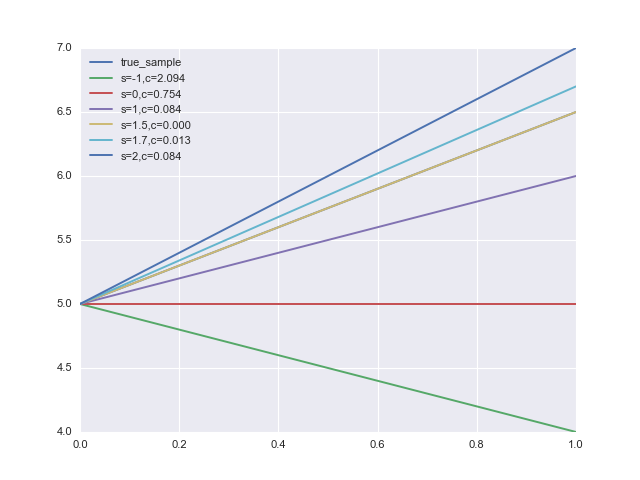

In [6]:
# Test with different slopes
x, y_true = line.get_sample(100)
plt.plot(x, y_true, label='true_sample')
#sns.regplot(x, y, fit_reg=False, label="True")
for s in [-1, 0, 1, 1.5, 1.7, 2]:
    l = Line(slope=s, intercept=5)
    y_pred = l.get_y(x)
    mse = compute_mse(y_true, y_pred)
    plt.plot(x, y_pred, label="s={},c={:.3f}".format(s, mse))
plt.legend(loc='upper left')
plt.show()

<IPython.core.display.Javascript object>


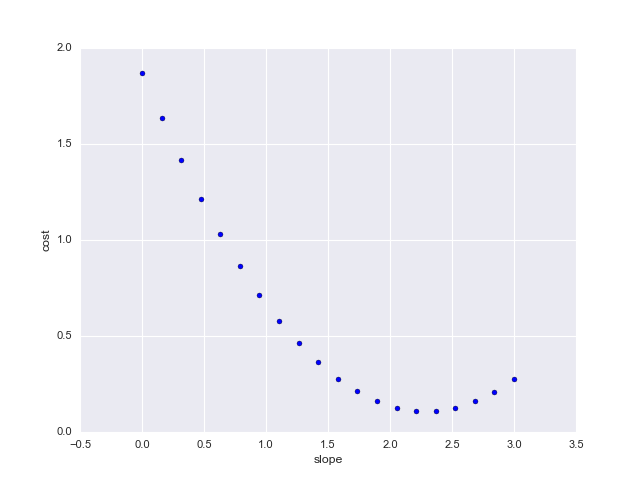

In [7]:
# Cost, testing with different slopes
costs = []
for s in np.linspace(0, 3, 20):
    l = Line(slope=s, intercept=5)
    y_pred = l.get_y(x)
    mse = compute_mse(y, y_pred)
    costs.append((s, mse))
plt.scatter(x=[x[0] for x in costs], y=[x[1] for x in costs])
plt.ylabel("cost")
plt.xlabel("slope")
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
slope = np.linspace(-2, 6, 20)
intercept = np.linspace(-100, 200, 20)
slope_s, intercept_s = np.meshgrid(slope, intercept)
slope_m, intercept_m, x_m = np.meshgrid(slope, intercept, x)
Y_pred = x_m * slope_m + intercept_m
cost = np.array([compute_mse(y, Y_pred[i][j]) for i in range(20) for j in range(20)]).reshape(20, 20)
#print(Y_pred.shape)
#print(slope.shape)
#print(intercept.shape)

# Plot the surface.
surf = ax.plot_surface(slope_s, intercept_s, cost, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(-1.01, 1.01)
#ax.zaxis.set_major_locator(LinearLocator(10))
#ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Regression (Scipy)

In [8]:
# using scipy
from scipy import stats

line = Line(slope=2, intercept=6)
(x, y) = line.get_rand_sample(100, 0, 10, noise=1)
slope, intercept, r, p, _ = stats.linregress(x, y)
print('Slope = {:.3f} (r = {:.3f}, p = {:.5f})'.format(slope, r, p))

Slope = 2.010 (r = 0.999, p = 0.00000)


# Gradient Descent

Fit regression line using gradient descent.

[Link 1](http://aimotion.blogspot.co.uk/2011/10/machine-learning-with-python-linear.html)
[Link 2](https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/)

In [3]:
# Squared error cost function
def compute_cost(X, y, theta):
    m = len(y)
    # compute predictions
    pred = X.dot(theta).flatten()
    # compute cost
    mse = ((y - pred)** 2).sum()/(2*m)
    return mse

In [48]:
# single gradient descent step
def gradient_descent_step(X, y, theta, alpha):
    # compute predictions
    pred = X.dot(theta).flatten()

    # get error
    errors = -np.sum((y-pred)*X.T, axis=1).reshape(2,1)

    # With regularization (notice bias should not be regularized) 
    #theta -= alpha * ((errors/len(y)) + (lambda*theta)/len(y))
    theta -= alpha * (errors/len(y))
    return theta

In [49]:
# run an entire training cycle
def train(X, y, alpha, iters):
    cost_history = np.zeros(shape=(iters, 1))
    theta_history = []
    
    # our parameters are slope and intercepts (bias)
    theta = np.random.randn(2, 1)
    for i in range(iters):
        theta = gradient_descent_step(X, y, theta, alpha)
        
        cost_history[i, 0] = compute_cost(X, y, theta)
        theta_history.append(theta.copy())
    
    return theta_history, cost_history

In [65]:
# target line
true_line = Line(slope=1.5, intercept=5)

#training data
(x_data, y) = true_line.get_rand_sample(100, noise=1)

# train data including bias/intercept input (set to 1)
X = np.ones(shape=(len(y), 2))
X[:,1] = x_data

print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [53]:
alpha = 0.01
epochs = 1000
theta_history, cost_history = train(X, y, alpha, epochs)

<IPython.core.display.Javascript object>


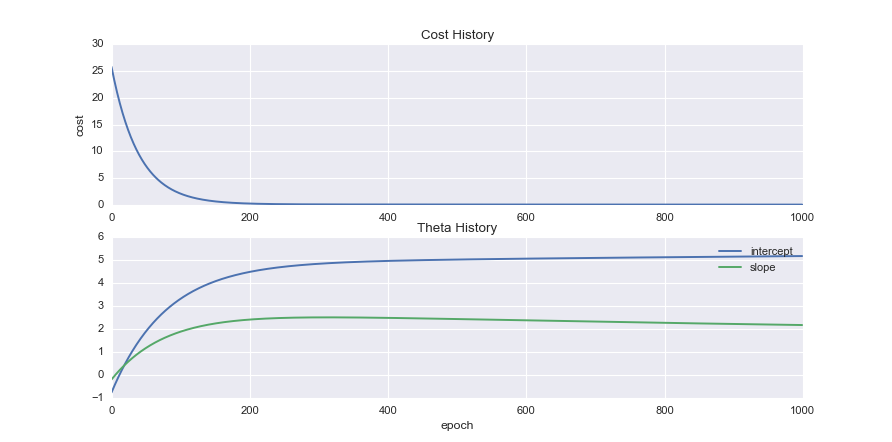

In [64]:
# Plot history
fig, axes = plt.subplots(2, 1)
# plot cost
axes[0].set_title('Cost History')
axes[0].plot(cost_history.reshape(-1))
axes[0].set_ylabel("cost")
# plot theta
axes[1].set_title('Theta History')
axes[1].plot([t[0] for t in theta_history], label='intercept')
axes[1].plot([t[1] for t in theta_history], label='slope')
axes[1].set_xlabel("epoch")
plt.legend()
plt.show()

## Training Animation

<IPython.core.display.Javascript object>


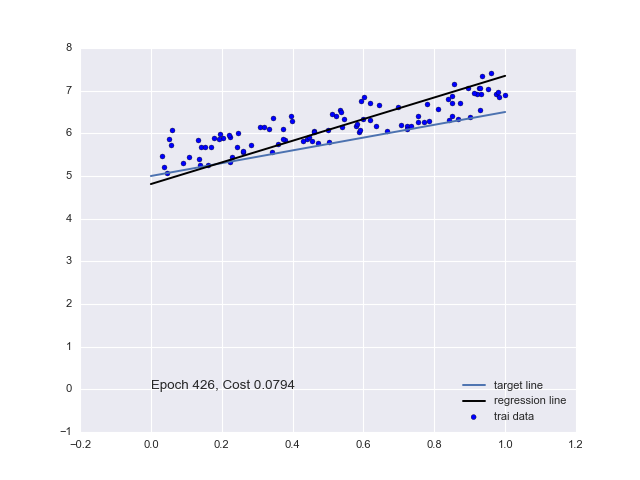

In [69]:
alpha = 0.01
epochs = 1000

# Plot SGD animation
fig, ax = sns.plt.subplots()
#ax.set_xlim(0, 2)
#ax.set_ylim(-10, 10)
# plot true line
ax.plot(*true_line.get_sample(2), label='target line')
ax.scatter(x_data, y, label='train data')
# initial fitted line
theta = np.random.randn(2, 1)
fit_line = Line(slope=theta[0], intercept=theta[1])
# plot initial fitted line
p_line, = ax.plot(*fit_line.get_sample(2), 'k-', label='regression line')
epoch_text = ax.text(0, 0, "Epoch 0")

def animate(i):
    global X, y, theta, alpha
    theta = gradient_descent_step(X, y, theta, alpha)
    fit_line.intercept = theta[0]
    fit_line.slope = theta[1]
    l_x, l_y = fit_line.get_sample(2)
    p_line.set_data(list(l_x), list(l_y))
    cost = compute_cost(X, y, theta)
    epoch_text.set_text("Epoch {}, Cost {:.4f}".format(i, cost))
    return epoch_text, p_line

ani = animation.FuncAnimation(fig, animate, epochs, interval=10, repeat=False)
plt.legend(loc='lower right')
plt.show()